# SYS 611: Weather Markov Chain Model

Paul T. Grogan <pgrogan@stevens.edu>

This example constructs a Markov chain model of weather conditions.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [2]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np
# import the matplotlib.pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

## State Transition Function

The state transition function is a process generator that samples the next state based on the current state. It uses the state transition function `P` where cell `(i,j)` specifies the probability of transitioning from state `i` to state `j`.

In [43]:
# state transition matrix; cell (i,j) is the probability of transitioning from state i to state j
P = [[186/250, 47/250, 17/250], 
     [47/89, 40/89, 2/89],
     [16/25, 3/25, 6/25]]

# define the state transition function
def _delta(q):
    r = np.random.rand()
    # if it is a clear day
    if q == 0:
        if r < P[0][0]:
            # another clear day
            return 0
        elif r < P[0][0]+P[0][1]:
            # a rainy day next
            return 1
        else:
            # a snowy day next
            return 2
    # if it is a rainy day
    elif q == 1:
        if r < P[1][0]:
            # a clear day next
            return 0
        elif r < P[1][0]+P[1][1]:
            # another rainy day
            return 1
        else:
            # a snowy day next
            return 2
    # if it is a snowy day
    else:
        if r < P[2][0]:
            # a clear day next
            return 0
        elif r < P[2][0]+P[2][1]:
            # a rainy day next
            return 1
        else:
            # another snowy day
            return 2
    """
    # alternatively, this function could be replaced with the following:
    pmf = P[int(q)]
    cdf = np.cumsum(pmf)
    for i in range(len(cdf)):
        if r < cdf[i]:
            return i
    """

## Simulation

Generate a state trajectory for a specified number of state transitions.

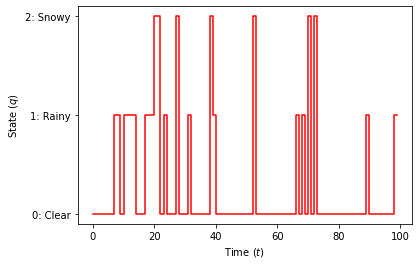

In [44]:
# define the number of samples and create a state trajectory
num_samples = 100
np.random.seed(0)
q = np.zeros(num_samples)

# perform all the state transitions
for t in range(num_samples - 1):
    q[t+1] = _delta(q[t])

# create a plot of the state trajectory
plt.figure()
plt.step(range(num_samples), q, '-r')
plt.xlabel('Time ($t$)')
plt.ylabel('State ($q$)')
plt.yticks([0,1,2], ['0: Clear','1: Rainy','2: Snowy'])
plt.show()

## Estimating the Steady-state Stochastic Distribution

Using the simulated samples, we can estimate the steady-state stochastic distribution (`pi`) by estimating the fraction of samples in each state. This estimate is affected by the initial conditions and other source of natural variation instrinsic to simulation.

In [45]:
# estimate the stationary distribution from the samples
pi = np.zeros(3)
for i in range(3):
    pi[i] = np.sum(q==i)/num_samples

print('estimated stationary distribution (solved using simulation):')
print(' P(q=0) = {:.3f} (clear day)'.format(pi[0]))
print(' P(q=1) = {:.3f} (rainy day)'.format(pi[1]))
print(' P(q=2) = {:.3f} (snowy day)'.format(pi[2]))

estimated stationary distribution (solved using simulation):
 P(q=0) = 0.770 (clear day)
 P(q=1) = 0.160 (rainy day)
 P(q=2) = 0.070 (snowy day)


## Steady-state Analysis (Using Linear Algebra)

Alternatively, we can solve for the steady-state stochastic distribution using linear algebra. Here, `P` is the state transition matrix and `v` are its eigenvectors. The steady-state stochastic distribution (`pi`) is the normalized eigenvector corresponding to the eigenvalue of 1.

In [46]:
# compute the eigenvalues and eigenvectors of the transpose of P
w,v = np.linalg.eig(np.transpose(P))

# the stationary distribution is the normalized eigenvector 
# corresponding to the eigenvalue of 1
pi_exact = v[:,0]/np.sum(v[:,0])

print('exact stationary distribution (solved using eigenvectors):')
print(' P(q=0) = {:.3f} (clear day)'.format(pi_exact[0]))
print(' P(q=1) = {:.3f} (rainy day)'.format(pi_exact[1]))
print(' P(q=2) = {:.3f} (snowy day)'.format(pi_exact[2]))

exact stationary distribution (solved using eigenvectors):
 P(q=0) = 0.683 (clear day)
 P(q=1) = 0.248 (rainy day)
 P(q=2) = 0.068 (snowy day)
